In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

the data we're about to analyze is taken from https://www.kaggle.com/fernandol/countries-of-the-world and contains socioeconomic indicators as well as their Gross Domestic Product aka GDP.
In the field of macroeconomics, the GDP is basically the main measure of the country's value of goods and services.
GDP is considered a strong indicator for many aspects of the nation's economic system, and as such, a major area of research is trying to explore, study, and predict the factors which can contribute to one's GDP.
To add some more variables which i think can help our model to be fully capble of predicting the GDP, i added a few more indicators taken from the World Bank such as Imports and Exports, the CIA factbook website and https://www.heritage.org/index/ranking for some indicators on market freedom.

with that in mind, let's start working.

In [224]:
dfc = pd.read_csv('countries_of_the_world.csv', decimal=',')
df_WB = pd.read_csv('additional_data_WB.csv')
df_rel = pd.read_csv('additional_data_religion.csv')
df_freedom = pd.read_csv('additional_data_freedom.csv')


## preprocessing the data:
### goals:
#### * clean each data set, then merge it based on country name - we want to make sure our columns are organized and ready to be fully merged to one another in order to create a one database to work on
#### * dealing with null values - we want to have zero null values, we will handle with them based on the characteristics of the specific variable and decide how to manage it.
#### * dealing with outliers -  basically we wanna have a somewhat normal distributed variables. when trying to predict values with regression models, outliers can be problematic and skew the results to an unwanted direction. we'll deal with that when we finish with steps 1 and 2.

In [225]:
### changing the column name to fit the other data
dfc.rename(columns = {'Country':'Country Name'}, inplace=True)

### removing the space after each country name
dfc['Country Name'].values
dfc['Country Name'] = dfc['Country Name'].apply(lambda x: x.split(" ")[0] if len(x.split())==1 else x)
### merging the data with the WorldBank data
df_n_wb = dfc.merge(df_WB, on = 'Country Name', how='left')
df_n_wb.head()

,Country Name,Region,Population,Area sqare km,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Birthrate,Deathrate,Agriculture,Industry,Service,"Foreign direct investment, net inflows 2013",Imports of goods and services 2013,Exports of goods and services 2013,"ATMs per 100,000 adults 2013",Government expenditure on education % of GDP 2014
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,46.60,20.34,0.380,0.240,0.380,4.831135e+07,7.208216e+09,1.383202e+09,0.700558,NaN
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,15.11,5.22,0.232,0.188,0.579,1.254151e+09,6.709055e+09,3.700233e+09,35.306900,3.22752
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,17.14,4.61,0.101,0.600,0.298,1.691887e+09,5.938731e+10,6.858977e+10,6.515052,NaN
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,22.46,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,8.71,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.52269


In [226]:
### removing the space in the country name column of the religion data
df_rel['Country Name'] = df_rel['Country Name'].apply(lambda x: x.strip())

#merging the data with the religion data
df_n_wb_rel = df_n_wb.merge(df_rel, on = 'Country Name', how = 'left' )
df_n_wb_rel.drop(['Unnamed: 1'],axis=1, inplace=True)
df_n_wb_rel['Country Name'].values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa ', 'Andorra',
       'Angola', 'Anguilla', 'Antigua & Barbuda ', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The ',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina ', 'Botswana', 'Brazil',
       'British Virgin Is. ', 'Brunei', 'Bulgaria', 'Burkina Faso ',
       'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde ', 'Cayman Islands ', 'Central African Rep. ', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep. ',
       'Congo, Repub. of the ', 'Cook Islands ', 'Costa Rica ',
       "Cote d'Ivoire ", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic ',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic ',
       'East Timor ', 'Ecuador', 'Egypt', 'El Salvador ',
       'Equatorial Guinea ', 'Eritrea', 'Estonia', 'Ethiopia',
      

In [227]:
### merging the data with the freedom index data
df = df_n_wb_rel.merge(df_freedom, on='Country Name', how='inner')

### rename some columns to be more comfortable to work with:

df.rename(columns = {'GDP ($ per capita)':'GDP', 'Country Name':'Country','Imports of goods and services  2013':'Imports', 'Exports of goods and services  2013':'Exports'
                    ,'Foreign direct investment, net inflows 2013': 'Net foreign invest'}, inplace=True)
df.Region = [x.strip() for x in df.Region]
df = df.rename(columns = lambda x: x.split('(')[0].strip())
df.head()

,Country,Region,Population,Area sqare km,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,...,"ATMs per 100,000 adults 2013",Government expenditure on education % of GDP 2014,Main Religion,Fiscal Freedom,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.700558,NaN,Muslim,NaN,59.7,75.8,69.5,NaN,65.0,NaN
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,35.306900,3.22752,Muslim,92.6,81.0,49.0,78.4,79.8,65.0,70.0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,6.515052,NaN,Muslim,80.4,65.2,52.6,76.6,67.8,20.0,30.0
3,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,17.024750,NaN,indigenous beliefs,82.6,43.1,44.8,61.5,70.2,35.0,40.0
4,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,...,43.312450,3.48652,Christian,64.3,60.1,47.4,60.4,67.6,40.0,30.0


In [228]:
df.Country = df.Country.astype('category')
df.Region = df.Region.astype('category')
df['Main Religion'] = df['Main Religion'].astype('str')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 33 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   Country                                            149 non-null    category
 1   Region                                             149 non-null    category
 2   Population                                         149 non-null    int64   
 3   Area sqare km                                      149 non-null    int64   
 4   Pop. Density                                       149 non-null    float64 
 5   Coastline                                          149 non-null    float64 
 6   Net migration                                      149 non-null    float64 
 7   Infant mortality                                   149 non-null    float64 
 8   GDP                                                149 non-null    float64 
 9  

In [301]:
df['Main Religion'].value_counts()
df['Main Religion'] = df['Main Religion'].replace('Christian ', 'Christian').replace('Christian (Free Wesleyan Church claims over 30','Christian')
df['Main Religion'] = df['Main Religion'].replace('Muslim*', 'Muslim')
df['Main Religion'] = df['Main Religion'].replace('Buddist', 'Buddhist').replace('Buddhist', 'Buddhist').replace('BuddhismAnd','Buddhist')
df['Main Religion'] = df['Main Religion'].replace('Buddhist ', 'Buddhist')
df['Main Religion'] = df['Main Religion'].replace('syncretic (part Christian', 'Christian')
df['Main Religion'] = df['Main Religion'].replace('Zionist 40% (a blend of Christianity and indigenous ancestral worship)', 'Zionist')


array(['Muslim', 'Muslim', 'Muslim', 'indigenous beliefs', 'Christian',
       'Christian', 'Christian', 'Christian', 'Muslim', 'Muslim',
       'Muslim', 'Christian', 'Christian', 'Christian', 'Christian',
       'Christian', 'Buddhist', 'Christian', 'Christian', 'Christian',
       'Christian', 'nan', 'Christian', 'Buddhist', 'indigenous beliefs',
       'Christian', 'Muslim', 'Christian', 'Buddhist', 'Christian',
       'Muslim', 'Christian', 'nan', 'Christian', 'Christian', 'Muslim',
       'Christian', 'Christian', 'Muslim', 'Muslim', 'Christian',
       'Christian', 'Christian', 'Christian', 'Christian', 'Christian',
       'Christian', 'Christian', 'Christian', 'Christian', 'Christian',
       'Muslim', 'Muslim', 'Hindu', 'Christian', 'Christian', 'Christian',
       'Christian', 'Hindu', 'Muslim', 'Muslim', 'Muslim', 'Christian',
       'Jewish', 'Christian', 'Christian', 'Buddhist', 'Muslim', 'Muslim',
       'Christian', 'Christian', 'Muslim', 'Buddhist', 'Christian',
       

## step 1 seems to be done, the data is clean and we're ready to move toward step 2 which is handling with null values.

### the guidline for this step will be as follows:
#### 1)for numerical data - we'll fill the null values based on the mean or median of the data, depends on what seems logically reasonable
#### 2)for categirical data - we'll fill the null values based on the mode or a value that fit the best based on the knowledge we have

In [231]:
### presenting the number of null values by total and percentage:

total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
percent = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data

,Total,Percent
,0,0
Government expenditure on education % of GDP 2014,58,0.389262
"ATMs per 100,000 adults 2013",21,0.140940
Exports,21,0.140940
Imports,21,0.140940
Climate,16,0.107383
Net foreign invest,14,0.093960
Fiscal Freedom,6,0.040268
Financial Freedom,4,0.026846
Trade Freedom,4,0.026846


In [232]:
### Let's have a look at the variable Climate for it is a categorial one.
## let's find out what can fit the most to our null value for climate in each country

print(pd.pivot_table(df,index=['Climate'],values = 'Region', aggfunc='sum'))
print(df[df.Climate.isnull()]['Country'])
df.loc[3,['Climate']] = 3
df.loc[25,['Climate']] = 3
df.loc[31,['Climate']] =3
df.loc[64,['Climate']] =3
df.loc[74,['Climate']] =1
df.loc[77,['Climate']] =2.5
df.loc[79,['Climate']] =3
df.loc[80,['Climate']] =3
df.loc[88,['Climate']] =3
df.loc[92,['Climate']] =3
df.loc[94,['Climate']] =1
df.loc[97,['Climate']] =2
df.loc[113,['Climate']] =1
df.loc[117,['Climate']] =3
df.loc[121,['Climate']] =3
df.loc[132,['Climate']] =3
df.Climate.isnull().sum()


                                                    Region
Climate                                                   
1.0      ASIA (EX. NEAR EAST)NORTHERN AFRICAOCEANIAC.W....
1.5      LATIN AMER. & CARIBSUB-SAHARAN AFRICAASIA (EX....
2.0      ASIA (EX. NEAR EAST)LATIN AMER. & CARIBLATIN A...
2.5                 ASIA (EX. NEAR EAST)SUB-SAHARAN AFRICA
3.0      EASTERN EUROPELATIN AMER. & CARIBWESTERN EUROP...
4.0      C.W. OF IND. STATESC.W. OF IND. STATESWESTERN ...
3          Angola
25         Canada
31        Croatia
64          Italy
74        Lebanon
77          Libya
79      Lithuania
80     Luxembourg
88          Malta
92        Moldova
94        Morocco
97          Nepal
113        Russia
117        Serbia
121      Slovenia
132      Tanzania
Name: Country, dtype: category
Categories (149, object): [Afghanistan, Albania, Algeria, Angola, ..., Vietnam, Yemen, Zambia, Zimbabwe]


0

Alright we handled the Climate column, let's move on and have a look at the other variables.

looks like government expenditure on education is null on nearly 40% of the data, it seems reasonable enoough to drop it


In [233]:
df.drop(['Government expenditure on education % of GDP 2014'], axis=1, inplace=True)

In [234]:
total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
percent = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data

,Total,Percent
,0,0
"ATMs per 100,000 adults 2013",21,0.140940
Exports,21,0.140940
Imports,21,0.140940
Net foreign invest,14,0.093960
Fiscal Freedom,6,0.040268
Financial Freedom,4,0.026846
Trade Freedom,4,0.026846
Monetary Freedom,3,0.020134
Labor Freedom,3,0.020134


In [237]:
total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
percent = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data

,Total,Percent
,0,0
"ATMs per 100,000 adults 2013",21,0.140940
Exports,21,0.140940
Imports,21,0.140940
Net foreign invest,14,0.093960
Fiscal Freedom,6,0.040268
Financial Freedom,4,0.026846
Trade Freedom,4,0.026846
Monetary Freedom,3,0.020134
Labor Freedom,3,0.020134


### Now moving to the numerical variables null values.
in order to fill the nulls, let's examine first what's the distribution for the top variables and see if we should use the median or the mean

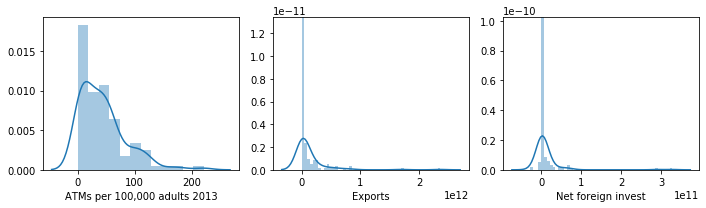

In [238]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.distplot(df['ATMs per 100,000 adults 2013'])
plt.subplot(1,3,2)
sns.distplot(df['Exports'])
plt.subplot(1,3,3)
sns.distplot(df['Net foreign invest'])
plt.tight_layout()

seems like the distributions are pretty much normal(except for ATM's which is a little bit skewd to the right but does'nt seem problematic), therefore i think using the mean will be just fine

In [239]:
columns = data.index[:16]
for column in columns:
    df[column] = df[column].fillna(df.groupby('Region')[column].transform('mean'))


In [240]:
total = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
percent = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data

,Total,Percent
,0,0
Financial Freedom,0,0.0
Investment Freedom,0,0.0
Region,0,0.0
Population,0,0.0
Area sqare km,0,0.0
Pop. Density,0,0.0
Coastline,0,0.0
Net migration,0,0.0
Infant mortality,0,0.0


### So, we took care of the null values.
next we're gonna take a look at  the variables which we expect to have high correlation with the GDP.


lets plot a heatmap to have a closer look at the details

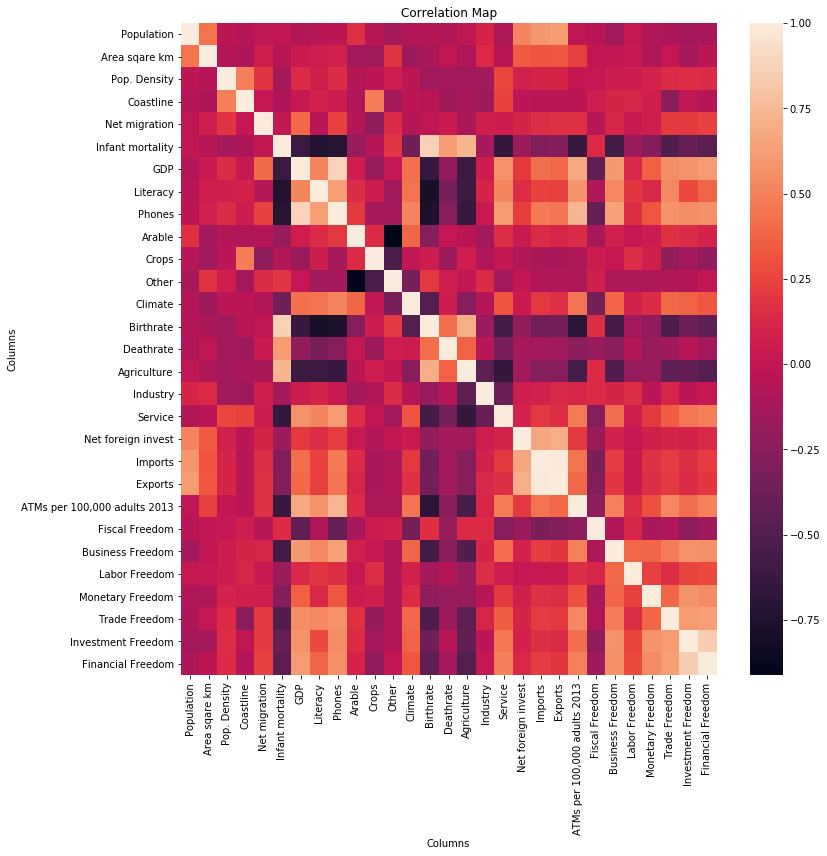

In [241]:
corrs = df.corr()
fig, ax = plt.subplots(figsize = (12,12))
heatcor = sns.heatmap(corrs, cbar=True ,ax=ax).set(title = 'Correlation Map', xlabel = 'Columns', ylabel = 'Columns' )

### alright looks like we can get some insights from this map:
looks like the "freedom" indicators are correlated quite well with the GDP

additionaly, ATM's, phones(maybe an inverse causality?), and Foreign investements and trades(imports and exports)

we'll take a closer look on the top 10 correlators

lets put it all in a nice correlation heatmap, this time smaller and more detailed

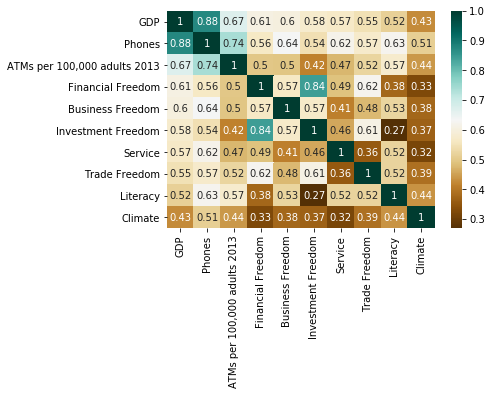

In [242]:
top_corrs = df.corr().nlargest(10, 'GDP').index
cm = np.corrcoef(df[top_corrs].values.T)
heatcor = sns.heatmap(cm, cbar = True, annot = True, cmap='BrBG', yticklabels = top_corrs.values, xticklabels=top_corrs.values)

### That's much better, now we can see much more clearly what type of correlations our variables have

well, i expected to see a strong correlation between imports and exports, but having it almost one is super interesting on the one hand, and can cause some problems of multicolinearity on the other, so i think we should seperate ways and stick with the Exports.

moving on, it looks like phone is the strongest correlator. again, this could be an inverse relationship, i.e, the more rich the country is, the more access to technology they have and not the other way around. let's keep that fact in mind.

what strikes me the most is the freedom aspect. 5 out of 7 indicators reflecting the economical freedom are being high at the top, and while i can think of some reasons why again that's maybe only an inverse causality, I also think it's reasonable enough to argue that that's not the case.

### Let's keep going on this direction and have a look at the correlations with more precise measures

In [248]:
df = df.drop(['Imports'], axis=1)


135

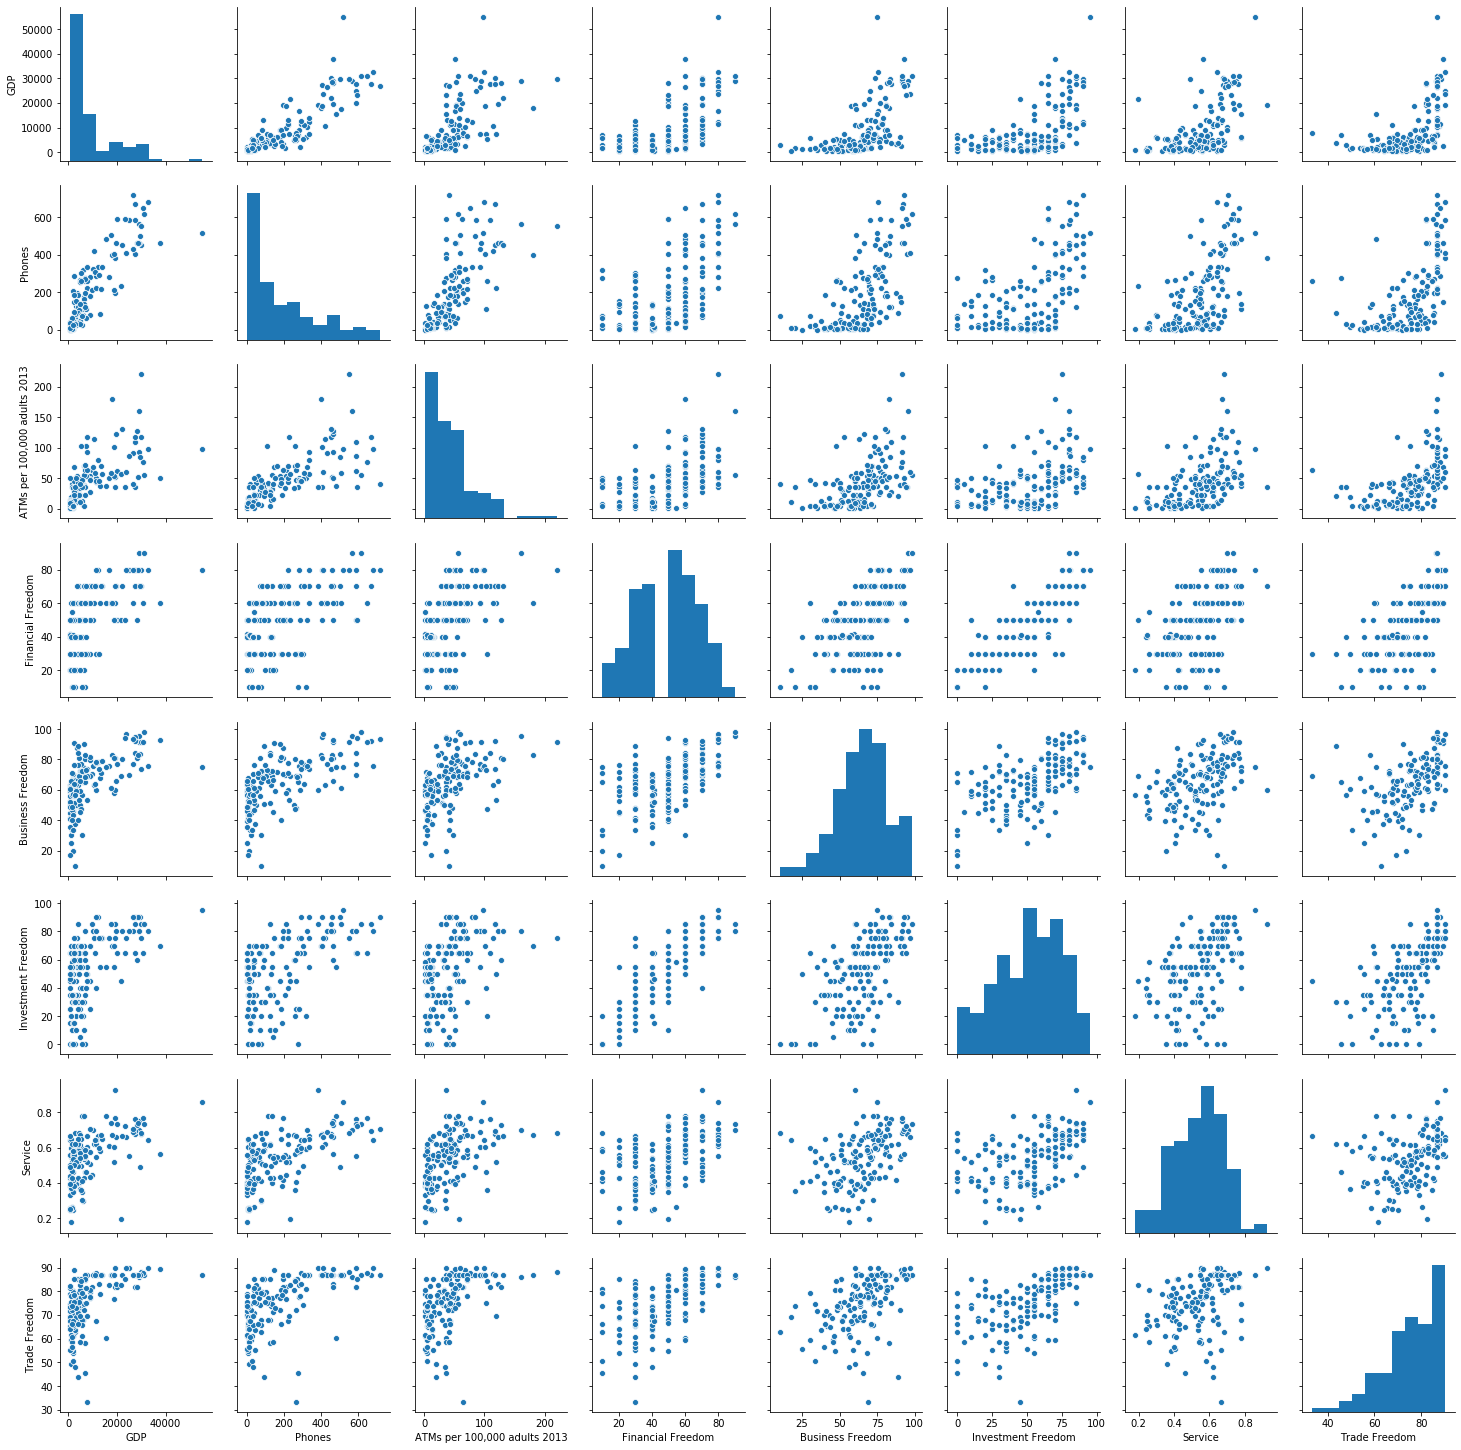

In [244]:
top_corrs = df.corr().nlargest(8, 'GDP').index
sns.pairplot(df[top_corrs])

Once again, we can observe the clear relationship with our variables but diving a little bit deeper into how it actually looks like. all these variables are positively correlated and we can definetely speculate why that's the case, but that requires more than just a few words so let's focus on the statistics.
Another thing to add, we can see that there is one outlier over there, but we'll handle it later as i've mentioned.

For now, let's further examine the Region variable

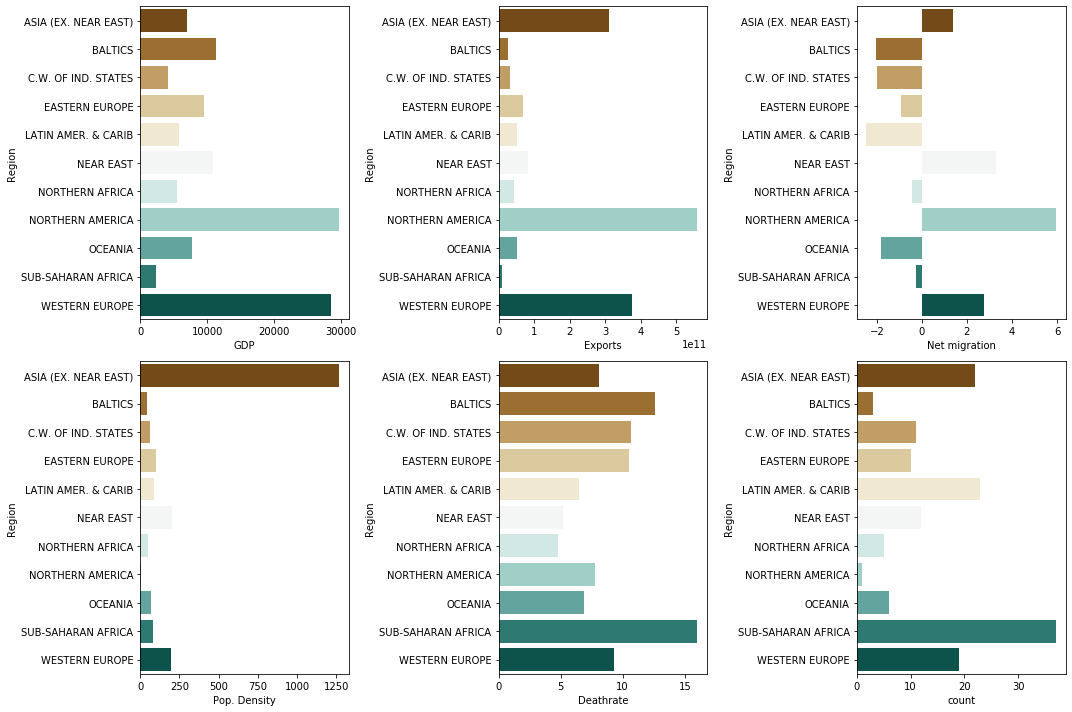

In [250]:
fig = plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.barplot(df['GDP'], df['Region'],palette='BrBG',ci = None )
plt.subplot(2,3,2)
sns.barplot(df['Exports'], df['Region'],palette='BrBG', ci = None)
plt.subplot(2, 3, 3)
sns.barplot(df['Net migration'], df['Region'], palette='BrBG', ci = None)
plt.subplot(2, 3, 4)
sns.barplot(df['Pop. Density'], df['Region'],palette='BrBG', ci = None)
plt.subplot(2, 3, 5)
sns.barplot(df['Deathrate'], df['Region'],palette='BrBG', ci = None)
plt.subplot(2, 3, 6)
sns.countplot(y = df['Region'],palette='BrBG')
plt.tight_layout()

### we can learn a lot from the plots above to be honest. 
first, the deathrate in sub-saharan african countries is substantialy higher than any other country, and this region also leading the way in teems of number of countries, but the density of the population isn't big.
second, and not surprising, western europe and north america have the highest GDP, what can explain the higher net migration if you ask me.

what about the religion aspect?

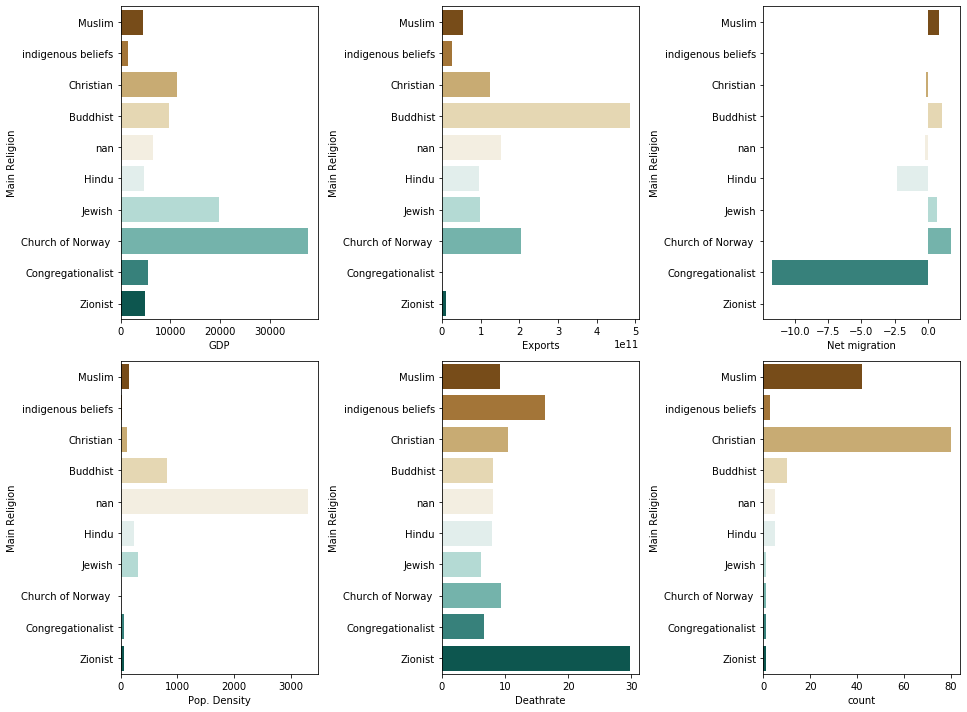

In [303]:
fig = plt.figure(figsize = (18,10))
plt.subplot(2,4,1)
sns.barplot(df['GDP'], df['Main Religion'],palette='BrBG',ci = None)
plt.subplot(2,4,2)
sns.barplot(df['Exports'], df['Main Religion'],palette='BrBG', ci = None)
plt.subplot(2, 4, 3)
sns.barplot(df['Net migration'], df['Main Religion'], palette='BrBG', ci = None)
plt.subplot(2, 4, 5)
sns.barplot(df['Pop. Density'], df['Main Religion'],palette='BrBG', ci = None)
plt.subplot(2, 4, 6)
sns.barplot(df['Deathrate'], df['Main Religion'],palette='BrBG', ci = None)
plt.subplot(2, 4, 7)
sns.countplot(y = df['Main Religion'],palette='BrBG')
plt.tight_layout()


Not much to learn in my opinion as we got the majority of the countries christian and muslim, with a few other ones that make it difficult to have a clear insight.

let's take a look at some outliers now

In [304]:
GDP_scaled = StandardScaler().fit_transform(df['GDP'][:,np.newaxis])
low_values = GDP_scaled[GDP_scaled[:,0].argsort()][:10]
high_values = GDP_scaled[GDP_scaled[:,0].argsort()][-10:]
print('the lower values of the distribution are:')
print(low_values)
print('the higher values of the distribution are:')
print(high_values)

the lower values of the distribution are:
[[-0.84159693]
 [-0.8315947 ]
 [-0.8315947 ]
 [-0.8315947 ]
 [-0.82159247]
 [-0.82159247]
 [-0.82159247]
 [-0.82159247]
 [-0.81159024]
 [-0.81159024]]
the higher values of the distribution are:
[[2.00903828]
 [2.01904051]
 [2.06905165]
 [2.08905611]
 [2.10906057]
 [2.19908063]
 [2.21908508]
 [2.37912074]
 [2.88923441]
 [4.61961999]]


seems like we got on potential outlier in the right side of the distribution, let's check who that is and see what we can do with it

In [305]:
df[df['GDP'].values == df.GDP.max()]

,Country,Region,Population,Area sqare km,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,...,Exports,"ATMs per 100,000 adults 2013",Main Religion,Fiscal Freedom,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
80,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,...,1.180000e+11,97.86274,Christian,65.0,74.8,39.0,79.3,86.8,95.0,80.0


So, Luxembourg is our outlier, and rightly so. it's one of the richest and developed countries in the world, with a very small number of people. I don't think this one outlier is going to cause any problem going through, so Luxemburg is here to stay.

## a few more feature engineering before diving deep to the models

In [306]:
df_final = pd.get_dummies(df, columns=['Region', 'Main Religion', 'Climate'])


One final thing to do - have a closer look at our star - the GDP
in order to be able to fit the regressions properly, we got some assumptions to make:

* Normality - We'll have a look at the distribution of our variable and see if it's normal.

* Homoscedasticity - Basically it means that for every "point" in the dataset(X's) theres an equality of variance among the Y's. from the scatter plots we've plotted earlier it seems reasonable to assume that's the case.

* Linearity - as we've observed from the plots above, there's seem to be a linear correlation between our variables so we can check this assumption with a degree of confidence.

* Absence of correlated errors - basically thats why we got rid of 'Imports'.

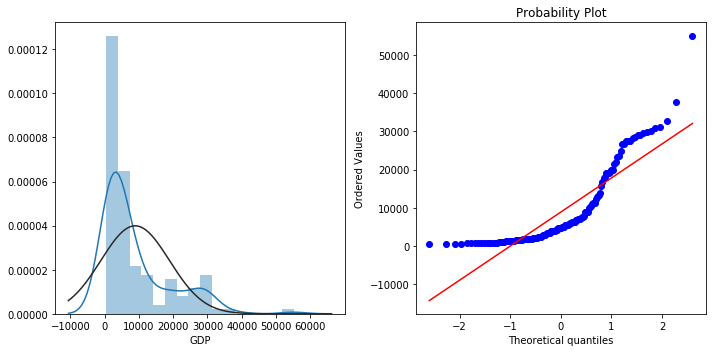

In [308]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df_final['GDP'], fit=norm)
plt.subplot(1,2,2)
res = stats.probplot(df_final['GDP'], plot=plt)
plt.tight_layout()

our target variable seems to be skewed to the right(remember the scaled values from earlier), which means it doesn't fit to the normality assumption, therefore we could have some problems in the future. the normality assumption is quite a strong one and it's important in order to statistically infer any insights for the data.
with a simple transformation we could probably solve this problem. let's go for it.

In [309]:
y = df_final.GDP.values

In [310]:
y = np.log(y)

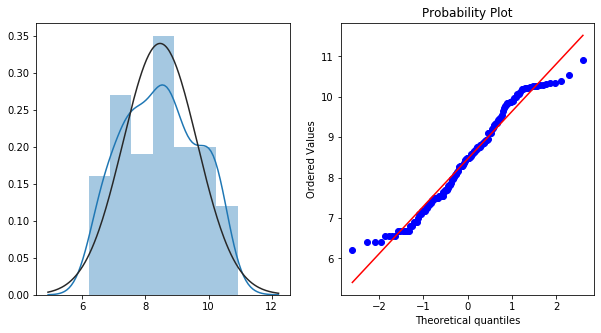

In [311]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(y, fit=norm)
plt.subplot(1,2,2)
res = stats.probplot(y, plot=plt)

### ## looks much better now. let's start with our models:
plan:
split the data into training and validation
train each set with a different method:
1. scaled
2. non-scaled

each method will be tested with specific features and all featuers.

accuracy will be evaluated by the mean square error value.

In [312]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV , RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.svm import SVR
import lightgbm as lgb

In [316]:
df_final1 = df_final.copy()
df_final1.columns

Index(['Country', 'Population', 'Area sqare km', 'Pop. Density', 'Coastline',
       'Net migration', 'Infant mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'Net foreign invest', 'Exports',
       'ATMs per 100,000 adults 2013', 'Fiscal Freedom', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom',
       'Region_ASIA (EX. NEAR EAST)', 'Region_BALTICS',
       'Region_C.W. OF IND. STATES', 'Region_EASTERN EUROPE',
       'Region_LATIN AMER. & CARIB', 'Region_NEAR EAST',
       'Region_NORTHERN AFRICA', 'Region_NORTHERN AMERICA', 'Region_OCEANIA',
       'Region_SUB-SAHARAN AFRICA', 'Region_WESTERN EUROPE',
       'Main Religion_Buddhist', 'Main Religion_Christian',
       'Main Religion_Church of Norway ', 'Main Religion_Congregationalist',
       'Main Religion_Hindu', 'Main Religion_Jewish', 'Main Religion_Mu

In [317]:
x_all = df_final1.drop(['Country','GDP'], axis=1)
x_features = df_final1[['Population', 'Pop. Density','Literacy','Infant mortality','Birthrate',
                      'ATMs per 100,000 adults 2013', 'Financial Freedom', 'Business Freedom',
                      'Phones','Net foreign invest', 'Service', 'Industry','Exports', 'Investment Freedom' ]]
x_all_scaled = StandardScaler().fit_transform(x_all)
x_features_scaled = StandardScaler().fit_transform(x_features)

In [318]:
x_all_train, x_all_test, y_train, y_test = train_test_split(x_all.values, y, train_size = 0.8)
x_features_train, x_features_test, y_train, y_test = train_test_split(x_features.values, y, train_size = 0.8)
x_all_scaled_train, x_all_scaled_test, y_train, y_test = train_test_split(x_all_scaled, y, train_size = 0.8)
x_features_scaled_train, x_features_scaled_test, y_train, y_test = train_test_split(x_features_scaled, y, train_size = 0.8)

In [319]:
models = []
models.append(('Lasso', Lasso()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('XGB', xgb.XGBRegressor(objective = 'reg:squarederror')))
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('Enet',ElasticNet(tol=0.5)))
models.append(('LightGBM',lgb.LGBMRegressor()))

## All features, without scaling

For Lasso , the mean squared error is: -1.566109(0.260716)
And the R2 score is: -3.771765
For RandomForest , the mean squared error is: -1.522051(0.310867)
And the R2 score is: -22.204776
For XGB , the mean squared error is: -1.804106(0.419441)
And the R2 score is: -8.317614
For LR , the mean squared error is: -3.318563(0.626275)
And the R2 score is: -0.366542
For SVR , the mean squared error is: -1.450656(0.250262)
And the R2 score is: -29.557672
For Enet , the mean squared error is: -1.663260(0.314533)
And the R2 score is: -3.025784
For LightGBM , the mean squared error is: -1.686699(0.319326)
And the R2 score is: -6.372929


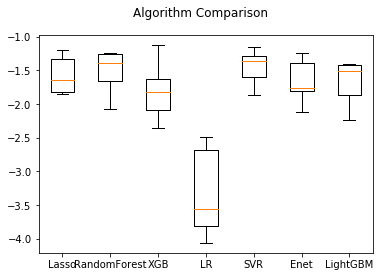

In [320]:
names = []
results = []
n_fold = 6
for name, model in models:
    kfold = KFold(n_fold, random_state = None)
    cv_results = cross_val_score(model,x_all_train,y_train, scoring = 'neg_mean_squared_error' )
    results.append(cv_results)
    names.append(name)
    model.fit(x_all_train, y_train)
    predictions = model.predict(x_all_test)
    r2_msg = 'And the R2 score is: %f' %(r2_score(predictions, y_test))
    rmse_msg = 'For ' '%s' ' , the mean squared error is: ' '%f(%f)' % (name, cv_results.mean(), cv_results.std())
    print(rmse_msg)
    print(r2_msg)
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## All features, with scaling

For Lasso , the mean squared error is: -1.363544(0.303256)
And the R2 score is: -519283788166223240738633678848.000000
For RandomForest , the mean squared error is: -1.476773(0.391905)
And the R2 score is: -9.989134
For XGB , the mean squared error is: -1.631268(0.391931)
And the R2 score is: -4.870851
For LR , the mean squared error is: -7.793805(9.709496)
And the R2 score is: -4.487370
For SVR , the mean squared error is: -1.663958(0.330224)
And the R2 score is: -13.875689
For Enet , the mean squared error is: -1.363544(0.303256)
And the R2 score is: -519283788166223240738633678848.000000
For LightGBM , the mean squared error is: -1.745509(0.285410)
And the R2 score is: -8.250556


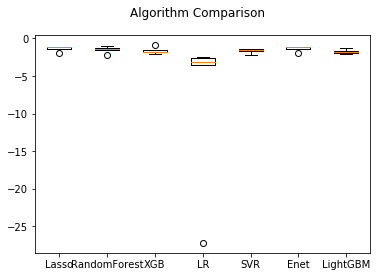

In [321]:
names = []
results = []
n_fold = 6
for name, model in models:
    kfold = KFold(n_fold, random_state = None)
    cv_results = cross_val_score(model,x_all_scaled_train,y_train, scoring = 'neg_mean_squared_error' )
    results.append(cv_results)
    names.append(name)
    model.fit(x_all_scaled_train, y_train)
    predictions = model.predict(x_all_scaled_test)
    r2_msg = 'And the R2 score is: %f' %(r2_score(predictions, y_test))
    rmse_msg = 'For ' '%s' ' , the mean squared error is: ' '%f(%f)' % (name, cv_results.mean(), cv_results.std())
    print(rmse_msg)
    print(r2_msg)
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Selected features, without scaling

For Lasso , the mean squared error is: -1.625085(0.343481)
And the R2 score is: -0.537696
For RandomForest , the mean squared error is: -1.817926(0.302032)
And the R2 score is: -19.444157
For XGB , the mean squared error is: -2.075531(0.436043)
And the R2 score is: -7.302093
For LR , the mean squared error is: -1.747776(0.326434)
And the R2 score is: -0.352537
For SVR , the mean squared error is: -1.444029(0.325838)
And the R2 score is: -229.477466
For Enet , the mean squared error is: -1.536107(0.321679)
And the R2 score is: -0.527938
For LightGBM , the mean squared error is: -2.059312(0.347785)
And the R2 score is: -21.442823


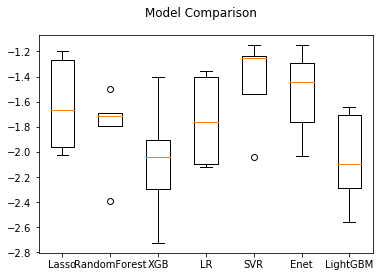

In [322]:
names = []
results = []
n_fold = 6
for name, model in models:
    kfold = KFold(n_fold, random_state = None)
    cv_results = cross_val_score(model,x_features_train,y_train, scoring = 'neg_mean_squared_error' )
    results.append(cv_results)
    names.append(name)
    model.fit(x_features_train, y_train)
    predictions = model.predict(x_features_test)
    r2_msg = 'And the R2 score is: %f' %(r2_score(predictions, y_test))
    rmse_msg = 'For ' '%s' ' , the mean squared error is: ' '%f(%f)' % (name, cv_results.mean(), cv_results.std())
    print(rmse_msg)
    print(r2_msg)
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## Selected features, with scaling

For Lasso , the mean squared error is: -1.354498(0.310431)
And the R2 score is: -519283788166223240738633678848.000000
For RandomForest , the mean squared error is: -0.247224(0.042961)
And the R2 score is: 0.908751
For XGB , the mean squared error is: -0.232221(0.042315)
And the R2 score is: 0.928063
For LR , the mean squared error is: -0.292201(0.112322)
And the R2 score is: 0.872944
For SVR , the mean squared error is: -0.322014(0.097188)
And the R2 score is: 0.775464
For Enet , the mean squared error is: -0.709376(0.228896)
And the R2 score is: -3.075282
For LightGBM , the mean squared error is: -0.213150(0.079448)
And the R2 score is: 0.924019


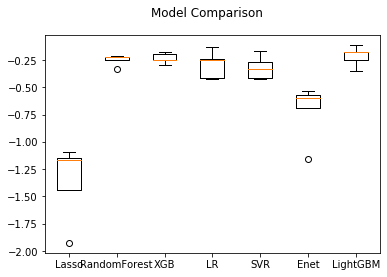

In [323]:
names = []
results = []
n_fold = 6
for name, model in models:
    kfold = KFold(n_fold, random_state = None)
    cv_results = (cross_val_score(model,x_features_scaled_train,y_train, scoring = 'neg_mean_squared_error' ))
    results.append(cv_results)
    names.append(name)
    model.fit(x_features_scaled_train, y_train)
    predictions = model.predict(x_features_scaled_test)
    r2_msg = 'And the R2 score is: %f' %(r2_score(predictions, y_test))
    rmse_msg = 'For ' '%s' ' , the mean squared error is: ' '%f(%f)' % (name, cv_results.mean(), cv_results.std())
    print(rmse_msg)
    print(r2_msg)

fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It appers that the XGB and Random forest had the best results overall(LightGBM also did quite well)
Let's examine these models further.

First, we're going to have each model fit to our data

Second, we'll generate predictions with the model by using our test data

Third, we'll take a look at the accuracy of the predictions by comparing them with the test data

finally, we'll perform a grid search and see if we improved the score.

In [324]:
model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror')
model_randomforest = RandomForestRegressor()


0.8951737636989404
0.11983323070161338


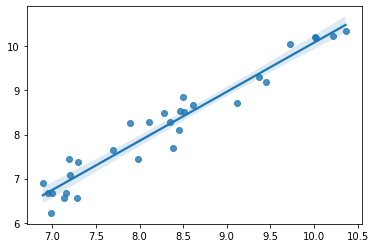

In [326]:
model_randomforest.fit(x_features_scaled_train, y_train)
RF_predictions = model_randomforest.predict(x_features_scaled_test)
print(r2_score(RF_predictions, y_test))
print(mean_squared_error(RF_predictions, y_test))
sns.regplot(RF_predictions, y_test)

##### Those scores are pretty good indeed! let's check if we can have any improvement by implementing grid search

In [328]:
###performing Search grid search
parameters = { 
                      'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
                                                 }
gridRF = GridSearchCV(model_randomforest,param_grid= parameters, n_jobs = 4, cv=5)

In [329]:
gridRF.fit(x_features_scaled_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [330]:
gridRF.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.12967758776766972
0.8732981657112832


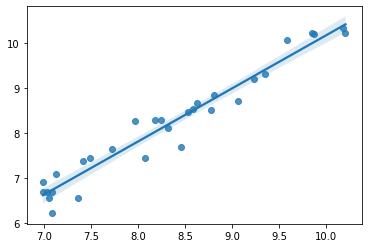

In [331]:
gridRF_preds = gridRF.predict(x_features_scaled_test)
print(mean_squared_error(gridRF_preds, y_test))
print(r2_score(gridRF_preds, y_test))
sns.regplot(gridRF_preds, y_test)

well it looks like our improved model actually did worse. that's a question to another day though. let's move on the the XGB model.

0.09133199045081213
0.9280631587333352


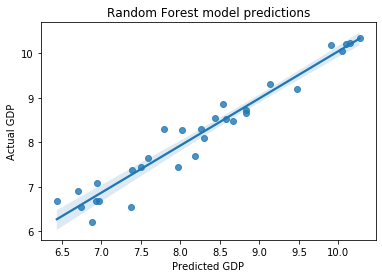

In [332]:
model_xgb.fit(x_features_scaled_train, y_train)
xgb_predictions = model_xgb.predict(x_features_scaled_test)
print(mean_squared_error(xgb_predictions, y_test))
print(r2_score(xgb_predictions, y_test))
graph = sns.regplot(xgb_predictions, y_test).set(title='Random Forest model predictions', xlabel='Predicted GDP', ylabel='Actual GDP')

Thats much better! i wonder if we can improve that high score. Let's see what our grid search has to say about it.

In [333]:
###performing Search grid search
n_estimators = [100,300, 400, 500]
learning_rate = [0.03,0.09, 0.1, 0.13, 0.2]
max_depth = [3,4,5,10]
min_child_weight = [1,2,3,4]
parameters = { 
                      'objective':['reg:linear'],
                      'learning_rate': learning_rate, 
                      'max_depth': max_depth,
                      'min_child_weight': min_child_weight,
                      'silent': [1],
                      'subsample': [0.5, 0.6, 0.8],
                      'n_estimators': n_estimators,
                      'booster': ['gbtree']
                                                 }
gridXGB = GridSearchCV(model_xgb,param_grid= parameters, n_jobs = 4, cv=5)

In [334]:
gridXGB.fit(x_features_scaled_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=...
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'booster': ['gbtree'],
                         'learning_rate': [0.03, 0.09, 0.1, 0.13, 0.2],
                         'max_depth': [3, 4, 5, 10],
                         'min_child_weight': [1, 

0.09210756172308392
0.932577140537989


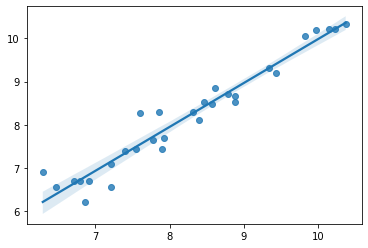

In [335]:
gridXGB_preds = gridXGB.predict(x_features_scaled_test)
print(mean_squared_error(gridXGB_preds, y_test))
print(r2_score(gridXGB_preds, y_test))
sns.regplot(gridXGB_preds, y_test)

Well, this time we actually improved our model! Think we can do even better?

Lets tune it a bit more!

In [338]:
model_xgb_2 = xgb.XGBRegressor(booster = 'gbtree',
 learning_rate = 0.06,
 max_depth= 5,
 min_child_weight= 2,
 n_estimators= 100,
 objective= 'reg:linear',
 silent= 1,
 subsample= 0.6)

0.07782077858256242
0.9428042942023181


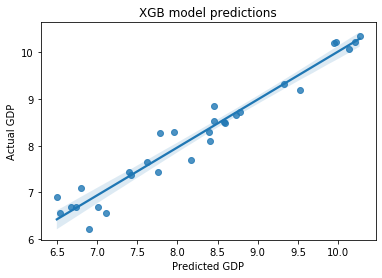

In [339]:
model_xgb_2.fit(x_features_scaled_train, y_train)
xgb_pred_2 = model_xgb_2.predict(x_features_scaled_test)
print(mean_squared_error(xgb_pred_2, y_test))
print(r2_score(xgb_pred_2, y_test))
graph = sns.regplot(xgb_pred_2, y_test).set(title='XGB model predictions', xlabel='Predicted GDP', ylabel='Actual GDP')

Alright, seems like we can't get better than this and it's pretty powerful score there to be honest! 

last thing to do is checking the coefficients of our features, how they actually contribute to the GDP

In [341]:
featuers_coefficients = model_xgb_2.feature_importances_.tolist()
feature_names = x_features.columns
for i in range(len(feature_names)):
    coefs = 'The coefficient for the feature %s is: ' '%f' %(feature_names[i], featuers_coefficients[i])
    print(coefs)



The coefficient for the feature Population is: 0.023937
The coefficient for the feature Pop. Density is: 0.025503
The coefficient for the feature Literacy is: 0.014994
The coefficient for the feature Infant mortality is: 0.202153
The coefficient for the feature Birthrate is: 0.051947
The coefficient for the feature ATMs per 100,000 adults 2013 is: 0.022876
The coefficient for the feature Financial Freedom is: 0.032130
The coefficient for the feature Business Freedom is: 0.094156
The coefficient for the feature Phones is: 0.381336
The coefficient for the feature Net foreign invest is: 0.020571
The coefficient for the feature Service is: 0.017615
The coefficient for the feature Industry is: 0.038557
The coefficient for the feature Exports is: 0.047083
The coefficient for the feature Investment Freedom is: 0.027141


In [342]:
feats = pd.DataFrame(pd.Series(featuers_coefficients, feature_names).sort_values(ascending=False),columns=['Coefficient'])
feats

,Coefficient
Phones,0.381336
Infant mortality,0.202153
Business Freedom,0.094156
Birthrate,0.051947
Exports,0.047083
Industry,0.038557
Financial Freedom,0.032130
Investment Freedom,0.027141
Pop. Density,0.025503
Population,0.023937


Ok, that seems to be all we needed.

Future questions will be why we got these results and is the relationships between the variables are correlational only or there's a causality there. but for now, that alone can give us some answers